## S&P 500 주식(매일 업데이트)
인기 금융 지수의 모든 구성원에 대한 주식 및 회사 데이터입니다.

In [2]:
# linear algebra
import numpy as np 

# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# ignoring the warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [3]:
df= pd.read_csv('/home/leejieun/workspace/kaggle-notebooks/datasets/andrewmvd/sp-500-stocks/sp500_companies.csv')
df.head(5)

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,422.86,3142035701760,1.184270e+11,0.176,Redmond,WA,United States,221000.0,Microsoft Corporation develops and supports so...,0.064830
1,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,170.85,2638248673280,1.301090e+11,0.021,Cupertino,CA,United States,161000.0,"Apple Inc. designs, manufactures, and markets ...",0.054436
2,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,950.02,2375050067968,3.448000e+10,2.653,Santa Clara,CA,United States,29600.0,"NVIDIA Corporation provides graphics, and comp...",0.049005
3,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,151.15,1872582148096,1.001720e+11,0.135,Mountain View,CA,United States,182502.0,Alphabet Inc. offers various products and plat...,0.038637
4,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,150.07,1871403024384,1.001720e+11,0.135,Mountain View,CA,United States,182502.0,Alphabet Inc. offers various products and plat...,0.038613


In [4]:
df[df['State'].isnull()].head(3)

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
32,NMS,LIN,Linde plc,Linde plc,Basic Materials,Specialty Chemicals,466.90,224847839232,1.209500e+10,0.051,Woking,NaN,United Kingdom,66323.0,Linde plc operates as an industrial gas compan...,0.004639
35,NYQ,ACN,Accenture plc,Accenture plc,Technology,Information Technology Services,333.82,209882333184,1.127721e+10,-0.001,Dublin,NaN,Ireland,742000.0,"Accenture plc, a professional services company...",0.004331
75,NYQ,ETN,"Eaton Corporation, PLC",Eaton Corporation plc,Industrials,Specialty Industrial Machinery,311.88,124718317568,4.859000e+09,0.108,Dublin,NaN,Ireland,94000.0,Eaton Corporation plc operates as a power mana...,0.002573


In [5]:
df = df.drop(['State'], axis=1)
df.head(3)

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,422.86,3142035701760,1.184270e+11,0.176,Redmond,United States,221000.0,Microsoft Corporation develops and supports so...,0.064830
1,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,170.85,2638248673280,1.301090e+11,0.021,Cupertino,United States,161000.0,"Apple Inc. designs, manufactures, and markets ...",0.054436
2,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,950.02,2375050067968,3.448000e+10,2.653,Santa Clara,United States,29600.0,"NVIDIA Corporation provides graphics, and comp...",0.049005


In [6]:
df.shape

(502, 15)

In [7]:
df[df["Revenuegrowth"].isnull()]

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,Country,Fulltimeemployees,Longbusinesssummary,Weight
344,NMS,WDC,Western Digital Corporation,Western Digital Corporation,Technology,Computer Hardware,64.98,21174384640,-1.058000e+09,NaN,San Jose,United States,53000.0,"Western Digital Corporation develops, manufact...",0.000437


In [8]:
#conda install yfinance

In [9]:
import yfinance as yf
def replace_null(df, sym, col, missing):
    ticker = yf.Ticker(sym)
    df.loc[df['Symbol']==sym, col] = ticker.info[missing]


In [10]:
replace_null(df, 'CVS', 'Revenuegrowth', 'revenueGrowth')

In [11]:
df[df['Symbol'] == 'CVS']

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,Country,Fulltimeemployees,Longbusinesssummary,Weight
97,NYQ,CVS,CVS Health Corporation,CVS Health Corporation,Healthcare,Healthcare Plans,78.98,99392389120,1.843900e+10,0.12,Woonsocket,United States,219000.0,CVS Health Corporation provides health solutio...,0.002051


In [12]:
df[df['Fulltimeemployees'].isnull()]

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,Country,Fulltimeemployees,Longbusinesssummary,Weight
10,NYQ,V,Visa Inc.,Visa Inc.,Financial Services,Credit Services,281.21,577624997888,2.342200e+10,0.088,San Francisco,United States,NaN,Visa Inc. operates as a payment technology com...,0.011918
84,NYQ,TJX,"TJX Companies, Inc. (The)","The TJX Companies, Inc.",Consumer Cyclical,Apparel Retail,98.18,111893782528,6.761000e+09,0.130,Framingham,United States,NaN,"The TJX Companies, Inc., together with its sub...",0.002309
163,NMS,ADSK,"Autodesk, Inc.","Autodesk, Inc.",Technology,Software - Application,261.57,55953752064,1.219000e+09,0.115,San Francisco,United States,NaN,"Autodesk, Inc. provides 3D design, engineering...",0.001155
186,NMS,ROST,"Ross Stores, Inc.","Ross Stores, Inc.",Consumer Cyclical,Apparel Retail,144.59,48678535168,2.727095e+09,0.155,Dublin,United States,NaN,"Ross Stores, Inc., together with its subsidiar...",0.001004
259,NYQ,DG,Dollar General Corporation,Dollar General Corporation,Consumer Defensive,Discount Stores,150.78,33095755776,3.295093e+09,-0.034,Goodlettsville,United States,NaN,"Dollar General Corporation, a discount retaile...",0.000683
283,NYQ,RMD,ResMed Inc.,ResMed Inc.,Healthcare,Medical Instruments & Supplies,193.31,28433772544,1.368189e+09,0.125,San Diego,United States,NaN,"ResMed Inc. develops, manufactures, distribute...",0.000587
291,NMS,DLTR,"Dollar Tree, Inc.","Dollar Tree, Inc.",Consumer Defensive,Discount Stores,126.15,27498557440,1.028200e+09,0.119,Chesapeake,United States,NaN,"Dollar Tree, Inc. operates retail discount sto...",0.000567
309,NMS,ULTA,"Ulta Beauty, Inc.","Ulta Beauty, Inc.",Consumer Cyclical,Specialty Retail,505.57,24551237632,1.921869e+09,0.102,Bolingbrook,United States,NaN,"Ulta Beauty, Inc. operate specialty retail sto...",0.000507
446,NYQ,KIM,Kimco Realty Corporation (HC),Kimco Realty Corporation,Real Estate,REIT - Retail,18.84,12677511168,1.074629e+09,0.027,Jericho,United States,NaN,Kimco Realty (NYSE:KIM) is a real estate inves...,0.000262


In [13]:
df.loc[df['Fulltimeemployees'].isnull(), 'Fulltimeemployees'] = df['Fulltimeemployees'].mode()[0]

In [14]:
df[df['Fulltimeemployees'].isnull()]

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,Country,Fulltimeemployees,Longbusinesssummary,Weight


In [15]:
df[df['Ebitda'].isnull()].head(3)

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,Country,Fulltimeemployees,Longbusinesssummary,Weight
11,NYQ,JPM,JP Morgan Chase & Co.,JPMorgan Chase & Co.,Financial Services,Banks - Diversified,194.82,561153703936,NaN,0.111,New York,United States,309926.0,JPMorgan Chase & Co. operates as a financial s...,0.011578
25,NYQ,BAC,Bank of America Corporation,Bank of America Corporation,Financial Services,Banks - Diversified,36.86,290848997376,NaN,-0.110,Charlotte,United States,213000.0,"Bank of America Corporation, through its subsi...",0.006001
38,NYQ,WFC,Wells Fargo & Company,Wells Fargo & Company,Financial Services,Banks - Diversified,56.73,200846901248,NaN,0.006,San Francisco,United States,226000.0,"Wells Fargo & Company, a financial services co...",0.004144


In [16]:
missing_EBITDA = df[df['Ebitda'].isnull()]
count_EBITDA = missing_EBITDA.groupby(['Sector', 'Industry'])['Industry'].count()
count_EBITDA

Sector              Industry               
Financial Services  Asset Management            5
                    Banks - Diversified         4
                    Banks - Regional           10
                    Capital Markets             4
                    Credit Services             4
                    Insurance - Reinsurance     1
Name: Industry, dtype: int64

In [17]:
Financial_companies = df[df['Sector']=='Financial Services']
count_fc = Financial_companies.groupby(['Sector', 'Industry'])['Industry'].count()
count_fc

Sector              Industry                        
Financial Services  Asset Management                    10
                    Banks - Diversified                  4
                    Banks - Regional                    10
                    Capital Markets                      5
                    Credit Services                      7
                    Financial Data & Stock Exchanges     8
                    Insurance - Diversified              3
                    Insurance - Life                     4
                    Insurance - Property & Casualty      8
                    Insurance - Reinsurance              1
                    Insurance - Specialty                1
                    Insurance Brokers                    5
Name: Industry, dtype: int64

In [18]:
for col in df.columns:
    b = df[col].unique()
    if len(b)<20:
        print(f'{col} has {len(b)} unique values -->> {b}, end = \n\n')

Exchange has 4 unique values -->> ['NMS' 'NYQ' 'BTS' 'NGM'], end = 


Sector has 11 unique values -->> ['Technology' 'Communication Services' 'Consumer Cyclical'
 'Financial Services' 'Healthcare' 'Consumer Defensive' 'Energy'
 'Basic Materials' 'Industrials' 'Utilities' 'Real Estate'], end = 


Country has 7 unique values -->> ['United States' 'United Kingdom' 'Ireland' 'Switzerland' 'Netherlands'
 'Canada' 'Bermuda'], end = 




<Figure size 1200x900 with 0 Axes>

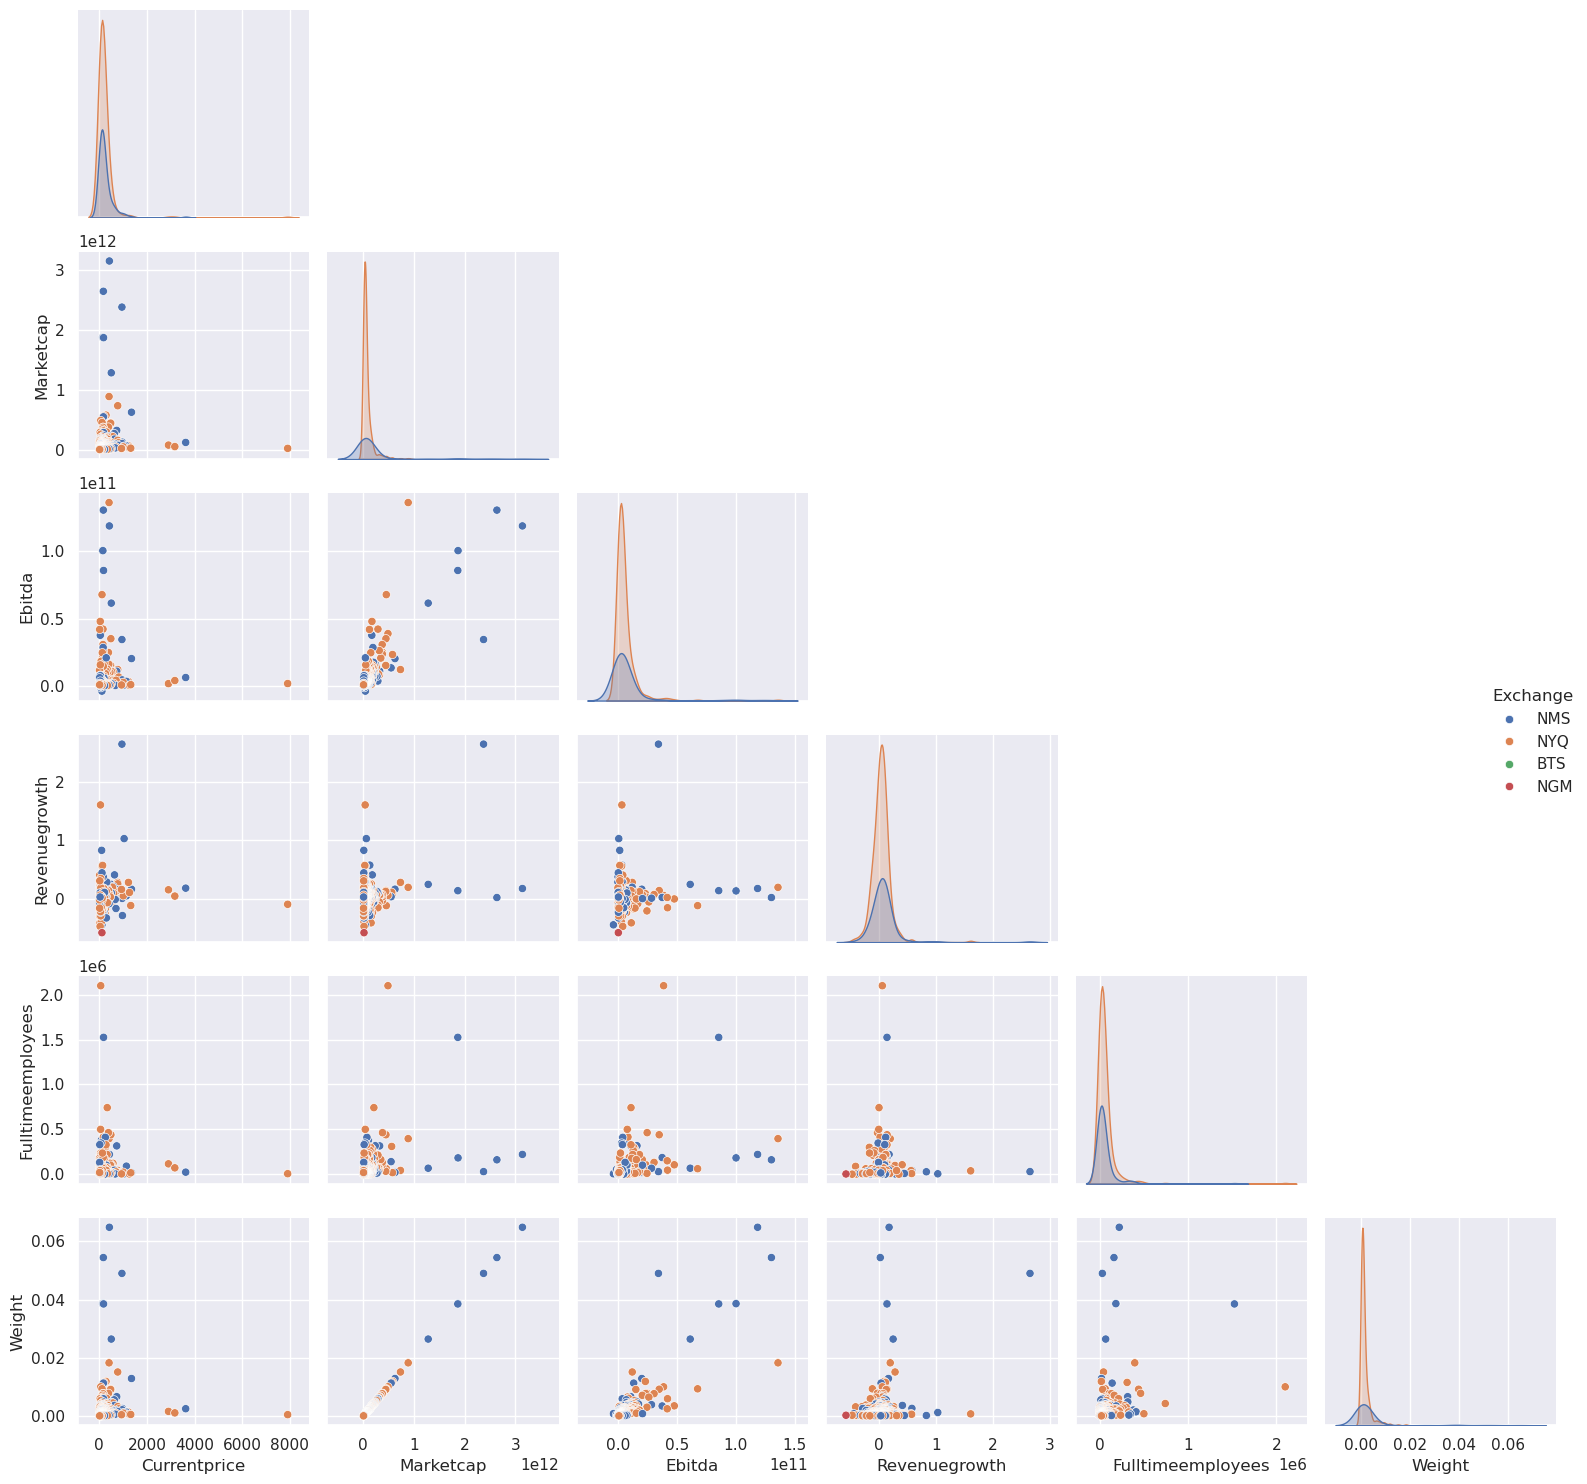

In [21]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(12,9))
sns.pairplot(df, corner=True, hue='Exchange')
plt.tight_layout()
plt.show()

In [20]:
SP_corr = df.corr()
mask = np.zeros_like(SP_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(SP_corr, mask=mask, vmax=1, vmin=-1, linewidths=.5, square=True, cmap='coolwarm', annot=True)
    plt.title('Correlation Heatmap of S&P 500 Companies dataset', fontsize = 15)
    plt.yticks(rotation=0)
    plt.tight_layout()

ValueError: could not convert string to float: 'NMS'